# Семинар 5: PyTorch

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
import torch.nn.functional as F
import torchvision
from torch import nn
from tqdm.notebook import tqdm

%matplotlib inline

### 1. Сравнение **PyTorch** и **NumPy**

Можно создавать матрицы, перемножать их, складывать, транспонировать и в целом совершать любые матричные операции

In [2]:
a = np.random.rand(5, 3)
a

array([[0.68931151, 0.92402257, 0.59414581],
       [0.68867649, 0.10845885, 0.64798397],
       [0.44384866, 0.4897526 , 0.98216652],
       [0.0848276 , 0.61885033, 0.02996125],
       [0.42015409, 0.12549449, 0.60661164]])

In [3]:
# размеры массива
a.shape

(5, 3)

In [4]:
# сложение
a + 5

array([[5.68931151, 5.92402257, 5.59414581],
       [5.68867649, 5.10845885, 5.64798397],
       [5.44384866, 5.4897526 , 5.98216652],
       [5.0848276 , 5.61885033, 5.02996125],
       [5.42015409, 5.12549449, 5.60661164]])

In [5]:
# матричное умножение
a @ a.T

array([[1.6819773 , 0.95992802, 1.34204256, 0.64810567, 0.76599255],
       [0.95992802, 0.90592186, 0.9952143 , 0.14495298, 0.69603585],
       [1.34204256, 0.9952143 , 1.40151031, 0.37016111, 0.84373973],
       [0.64810567, 0.14495298, 0.37016111, 0.39106913, 0.13147781],
       [0.76599255, 0.69603585, 0.84373973, 0.13147781, 0.56025601]])

In [6]:
# среднее по колонкам
a.mean(axis = 1)

array([0.73582663, 0.48170644, 0.63858926, 0.24454639, 0.38408674])

In [9]:
# решейп
a = a.reshape(3, 5)

a

array([[0.68931151, 0.92402257, 0.59414581, 0.68867649, 0.10845885],
       [0.64798397, 0.44384866, 0.4897526 , 0.98216652, 0.0848276 ],
       [0.61885033, 0.02996125, 0.42015409, 0.12549449, 0.60661164]])


1. При помощи **NumPy** посчитайте сумму квадратов натуральных чисел от 1 до 10000.

In [10]:
sm = np.sum(np.arange(1, 10001)**2)

In [11]:
sm

333383335000

Аналогичные операции в **PyTorch** очень похожи, но иногда имеют немного другой синтаксис

In [12]:
# случайный тензор
x = torch.rand(5, 3)
x

tensor([[0.9121, 0.0844, 0.5289],
        [0.1053, 0.8315, 0.4626],
        [0.0111, 0.1939, 0.4698],
        [0.1289, 0.1395, 0.7038],
        [0.8056, 0.0912, 0.9273]])

In [13]:
# размеры тензора
x.shape

torch.Size([5, 3])

In [14]:
# тоже размеры тензора
x.size()

torch.Size([5, 3])

In [15]:
# сложение
x + 5

tensor([[5.9121, 5.0844, 5.5289],
        [5.1053, 5.8315, 5.4626],
        [5.0111, 5.1939, 5.4698],
        [5.1289, 5.1395, 5.7038],
        [5.8056, 5.0912, 5.9273]])

In [16]:
# матричное умножение
x.mm(x.t())

tensor([[1.1187, 0.4108, 0.2749, 0.5016, 1.2329],
        [0.4108, 0.9164, 0.3797, 0.4551, 0.5896],
        [0.2749, 0.3797, 0.2584, 0.3591, 0.4622],
        [0.5016, 0.4551, 0.3591, 0.5315, 0.7693],
        [1.2329, 0.5896, 0.4622, 0.7693, 1.5172]])

In [17]:
# очередное матричное умножение
torch.matmul(x, x.t())

tensor([[1.1187, 0.4108, 0.2749, 0.5016, 1.2329],
        [0.4108, 0.9164, 0.3797, 0.4551, 0.5896],
        [0.2749, 0.3797, 0.2584, 0.3591, 0.4622],
        [0.5016, 0.4551, 0.3591, 0.5315, 0.7693],
        [1.2329, 0.5896, 0.4622, 0.7693, 1.5172]])

In [18]:
# поэлементное умножение
x * x

tensor([[8.3187e-01, 7.1173e-03, 2.7971e-01],
        [1.1083e-02, 6.9137e-01, 2.1398e-01],
        [1.2233e-04, 3.7606e-02, 2.2067e-01],
        [1.6622e-02, 1.9463e-02, 4.9537e-01],
        [6.4896e-01, 8.3245e-03, 8.5997e-01]])

In [29]:
# среднее по колонкам
x.mean(dim = 0)

tensor([0.3926, 0.2681, 0.6185])

In [30]:
# решейп
x.view(3,5).shape

torch.Size([3, 5])

In [31]:
# или так
x.reshape([3,5]).shape

torch.Size([3, 5])

Небольшой пример того, как меняются операции:

* `x.reshape([1,2,8]) -> x.view(1,2,8)`

* `x.sum(axis=-1) -> x.sum(dim=-1)`

* `x.astype("int64") -> x.type(torch.LongTensor)`

Для помощи вам есть [таблица](https://github.com/torch/torch7/wiki/Torch-for-Numpy-users), которая поможет вам найти аналог **NumPy** операции в **PyTorch**


При помощи pytorch посчитайте сумму квадратов натуральных чисел от 1 до 10000.

In [32]:
sm = torch.sum(torch.arange(1, 10001)**2)
sm.item()

333383335000

### 2. Создаем тензоры в **PyTorch** и изучаем базовые операции

In [33]:
# пустой тензор
x = torch.empty(5,3)
x

tensor([[0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 1.4013e-45],
        [0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00]])

In [34]:
# тензор с нулями и указанием типов чисел
x = torch.zeros(5, 3, dtype = torch.float32)
x

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])

In [35]:
# конструируем тензор из питоновского листа
x = torch.tensor([5.5, 7])
x

tensor([5.5000, 7.0000])

In [36]:
# используем уже созданный тензор для создания тензора из единичек
x1 = x.new_ones(5,3)
x1

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

In [37]:
# создаем случайный тензор с размерами другого тензора
x = torch.randn_like(x1)
x

tensor([[ 0.0599,  1.3119, -0.7991],
        [-0.6608, -0.8980,  0.1215],
        [-1.6461,  0.8285,  1.3776],
        [-1.2365,  1.2793,  0.3880],
        [-0.5874, -0.3271, -0.6798]])

In [38]:
x = torch.rand(5, 3)
y = torch.rand(5, 3)

In [39]:
x

tensor([[0.0456, 0.3709, 0.3296],
        [0.4672, 0.9612, 0.6984],
        [0.5591, 0.2567, 0.2437],
        [0.2285, 0.1091, 0.4695],
        [0.0595, 0.8693, 0.0373]])

In [40]:
y

tensor([[0.4312, 0.7207, 0.9762],
        [0.4304, 0.5417, 0.9531],
        [0.9145, 0.9777, 0.1694],
        [0.0481, 0.4329, 0.0464],
        [0.5913, 0.9081, 0.3548]])

In [41]:
# сложение
x + y

tensor([[0.4769, 1.0916, 1.3058],
        [0.8976, 1.5029, 1.6515],
        [1.4735, 1.2345, 0.4130],
        [0.2767, 0.5420, 0.5159],
        [0.6507, 1.7774, 0.3920]])

In [43]:
# очередное сложение
z = torch.add(x, y)

z

tensor([[0.4769, 1.0916, 1.3058],
        [0.8976, 1.5029, 1.6515],
        [1.4735, 1.2345, 0.4130],
        [0.2767, 0.5420, 0.5159],
        [0.6507, 1.7774, 0.3920]])

In [44]:
# наконец, ещё одно сложение!
torch.add(x, y, out = x)

tensor([[0.4769, 1.0916, 1.3058],
        [0.8976, 1.5029, 1.6515],
        [1.4735, 1.2345, 0.4130],
        [0.2767, 0.5420, 0.5159],
        [0.6507, 1.7774, 0.3920]])

In [54]:
# добавили измерение в начало, аналог броадкастинга
x.unsqueeze(0).shape

torch.Size([1, 5, 3])

In [55]:
# убрали одно единичное измерение
x.unsqueeze(0).unsqueeze(1).squeeze(0).size()

torch.Size([1, 5, 3])

In [56]:
# убрали все единичные измерения
x.unsqueeze(0).unsqueeze(1).squeeze().size()

torch.Size([5, 3])

In [57]:
# операции без _ не меняют тензор, а создают копию
x.unsqueeze(0)
x.size()

torch.Size([5, 3])

In [58]:
# операции с _ меняют тензор
x.unsqueeze_(0)
x.size()

torch.Size([1, 5, 3])

In [59]:
#можно переводить в np и наоборот
torch.from_numpy(x.numpy())

tensor([[[0.4769, 1.0916, 1.3058],
         [0.8976, 1.5029, 1.6515],
         [1.4735, 1.2345, 0.4130],
         [0.2767, 0.5420, 0.5159],
         [0.6507, 1.7774, 0.3920]]])

**2.1** считаем производные

In [60]:
# Уравнение: y = ax + b
# Производная: y' = a

x = torch.tensor(5.0, requires_grad=True)
assert x.grad is None

y = 10 * x - 1
y.backward()

print(f"x.grad = {x.grad}")

x.grad = 10.0


In [61]:
x = torch.tensor(np.pi, requires_grad=True)
y = torch.sin(x)
y.backward()

print(f"x.grad = {x.grad}")

x.grad = -1.0


In [62]:
x = torch.tensor(8.0, requires_grad=True)
y = torch.log(x)
y.backward()

print(f"x.grad = {x.grad}")

x.grad = 0.125


In [63]:
y = torch.log(x)
y.backward()

print(f"x.grad = {x.grad}")

x.grad = 0.25


In [64]:
y = torch.log(x)
y.backward()

print(f"x.grad = {x.grad}")

x.grad = 0.375


In [66]:
x.grad.zero_() # чтобы не накапливались градиенты

y = torch.log(x)
y.backward()

print(f"x.grad = {x.grad}")

x.grad = 1.0


In [67]:
x = torch.tensor(1.0, requires_grad=True)

numerator = x ** 2 - x + 1
denominator = torch.cos(torch.log(x)) ** 2
fraction = numerator / denominator
y = torch.exp(-fraction)
y.backward()

print(f"x.grad = {x.grad}")

x.grad = -0.3678794503211975


In [68]:
x = torch.tensor([10.0, -10.0], requires_grad=True)
y = torch.dot(
    x,
    torch.tensor([2.0, 3.0])
)
y.backward()

print(f"x.grad = {x.grad}")

x.grad = tensor([2., 3.])


In [ ]:
w = torch.tensor([10.0, 10.0], requires_grad=True)
x = [3.0, 5.0]
y = 100
a = torch.dot(
    w,
    torch.tensor(x)
)
Q = (y - a) ** 2
Q.backward()

print(f"w.grad = {w.grad}")

w.grad = tensor([-120., -200.])


### 3. Работаем с градиентами руками

In [69]:
# скачиваем The Boston Housing Dataset
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

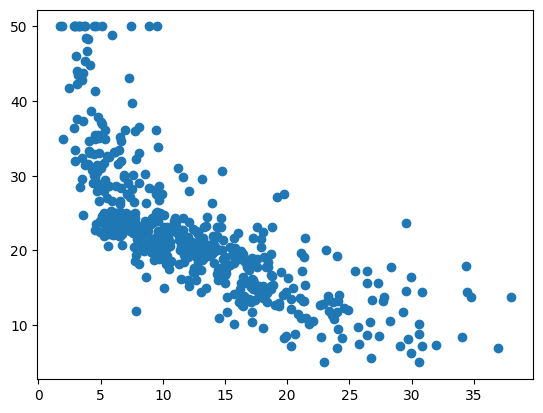

In [70]:
plt.scatter(data[:, -1], target)

В **PyTorch** есть возможность при создании тензора указывать нужно ли считать по нему градиент или нет, с помощью параметра `requires_grad`. Когда `requires_grad=True` мы сообщаем фреймворку, о том, что мы хотим следить за всеми тензорами, которые получаются из созданного. Иными словами, у любого тензора, у которого указан данный параметр, будет доступ к цепочке операций и преобразований совершенными с ними. Если эти функции дифференцируемые, то у тензора появляется параметр `.grad`, в котором хранится значение градиента.

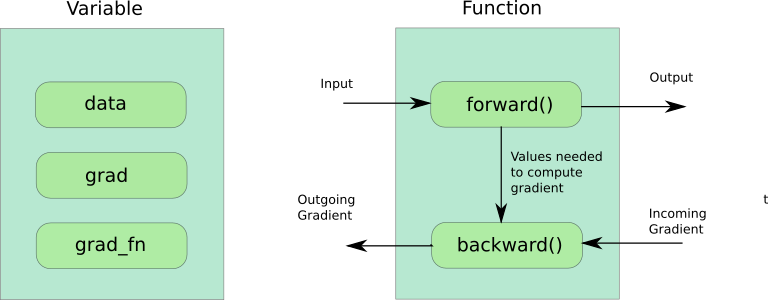

Если к результирующему тензору применить метод `.backward()`, то фреймворк посчитает по цепочке градиенты для всех тензоров, у которых `requires_grad=True`.

In [74]:
w = torch.rand(1, requires_grad=True)
b = torch.rand(1, requires_grad=True)

In [75]:
w

tensor([0.8902], requires_grad=True)

In [88]:
w = torch.rand(1, requires_grad=True)
b = torch.rand(1, requires_grad=True)

x = torch.tensor(data[:, -1] / data[:, -1].max(), dtype=torch.float32)
y = torch.tensor(target, dtype=torch.float32)

# только создали тензоры и в них нет градиентов
assert w.grad is None
assert b.grad is None

In [89]:
x.size(), y.size()

(torch.Size([506]), torch.Size([506]))

Создадим модель линейной регрессии и посчитаем градиент лосса

In [90]:
y_pred = w*x + b
loss = torch.mean((y_pred - y)**2)
loss.backward()

In [91]:
# сделали операции и посчитали градиенты, появилось значение соответствующих полей
assert w.grad is not None
assert b.grad is not None

print(f"dL/dw = {w.grad}")
print(f"dL/db = {b.grad}")

dL/dw = tensor([-11.7417])
dL/db = tensor([-43.0008])


Для доступа к значениям в тензоре используйте атрибут `.data`:

In [92]:
w.data, w.grad

(tensor([0.5807]), tensor([-11.7417]))

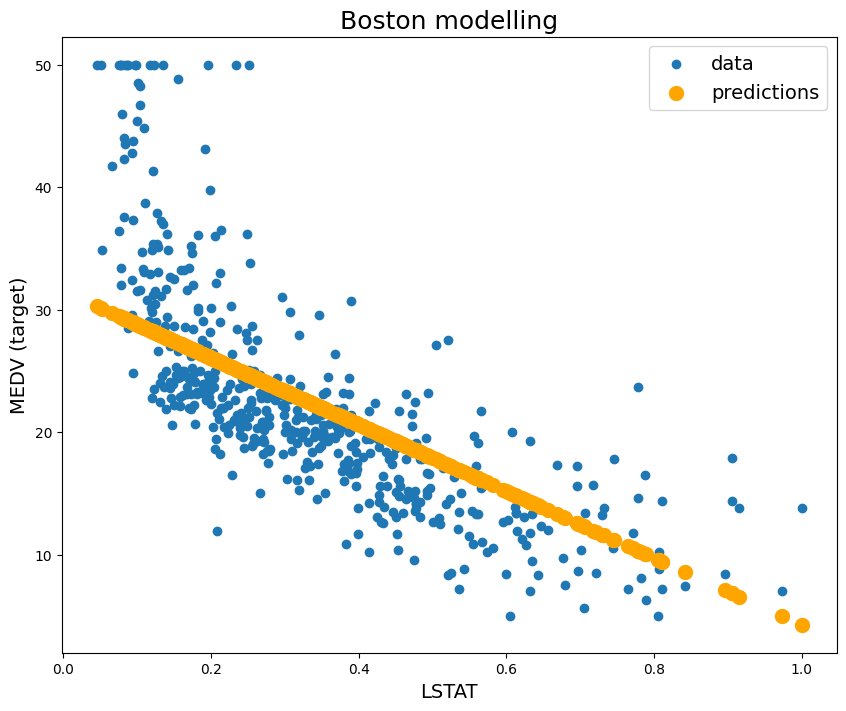

loss =  41.247242


In [93]:
from IPython.display import clear_output

for i in range(500):
    y_pred = w*x + b
    loss = torch.mean((y_pred - y)**2)
    loss.backward()

    # делаем шаг градиентного спуска с lr = .05
    w.data = w.data - 0.05 * w.grad
    b.data = b.data - 0.05 * b.grad

    # обнуляем градиенты, чтобы на следующем шаге опять посчитать и не аккумулировать их
    w.grad.zero_()
    b.grad.zero_()

    # рисуем картинки
    if (i + 1) % 5 == 0:
        clear_output(True)
        plt.figure(figsize=(10, 8))
        plt.scatter(x.data.numpy(), y.data.numpy(), label="data")
        plt.scatter(
            x.data.numpy(),
            y_pred.data.numpy(),
            color="orange",
            linewidth=5,
            label="predictions",
        )
        plt.xlabel("LSTAT", fontsize=14)
        plt.ylabel("MEDV (target)", fontsize=14)
        plt.title("Boston modelling", fontsize=18)
        plt.legend(fontsize=14)
        plt.show()

        print("loss = ", loss.data.numpy())

### 4. Моя первая нейросеть

Для того, чтобы разобраться как обучать нейросети в **PyTorch**, нужно освоить три вещи:

1. Как формировать батчи и подавать их на вход сети
2. Как задать архитектуру сети
3. Как написать цикл обучения и отслеживать метрики

#### Как формировать батчи и подавать их на вход нейросети

Чтобы иметь возможность итерироваться по данным и применять к ним преобразования, нужно создать свой класс унаследованный от `torch.utils.data.Dataset`.

У такого класса **должно быть** три метода:

* `__init__` — создаёт поля класса (например, путь к папке с файлами с тренировочными объектами)
* `__len__` — возвращает информацию о том, сколько объектов у нас в датасете
* `__getitem__` — по индексу возвращает семпл и таргет к нему


In [94]:
class RandomDataset(torch.utils.data.Dataset):
    """
    Our random dataset
    """

    def __init__(self, x, y):
        self.x = x
        self.y = y

    def __len__(self):
        return len(self.x)

    def __getitem__(self, idx):
        return {
            "sample": torch.tensor(self.x[idx, :], dtype=torch.float),
            "target": self.y[idx],
        }

In [95]:
x = np.random.rand(1000, 5)
y = np.random.rand(1000)

In [96]:
our_dataset = RandomDataset(x, y)

In [97]:
our_dataset.__getitem__(1)

{'sample': tensor([0.9919, 0.1261, 0.7114, 0.0781, 0.5377]),
 'target': 0.7647769306466059}

Для того, чтобы из данных получать батчи в pytorch используется такая сущность как даталоадер, который принимает на вход класс унаследованный от `torch.utils.data.Dataset`.

In [98]:
dataloader = torch.utils.data.DataLoader(our_dataset, batch_size=4)

Работают с ним следующим образом:

In [99]:
batch = next(iter(dataloader))

print(f"Sample:\n{batch['sample']}")
print(f"Target:\n{batch['target']}")

Sample:
tensor([[0.9573, 0.9415, 0.6017, 0.2216, 0.5484],
        [0.9919, 0.1261, 0.7114, 0.0781, 0.5377],
        [0.5619, 0.8511, 0.0683, 0.2439, 0.1057],
        [0.7524, 0.8523, 0.4252, 0.4603, 0.2158]])
Target:
tensor([0.1059, 0.7648, 0.8652, 0.9467], dtype=torch.float64)


In [100]:
from torch.utils.data import DataLoader

**Как сделать нейросеть**

Для того, чтобы в **PyTorch** создавать нейросети, используется модуль `torch.nn`. Нейросеть должна быть унаследована от класса `nn.Module`. Пример как это может выглядеть:

```
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.conv1 = nn.Conv2d(1, 20, 5)
        self.conv2 = nn.Conv2d(20, 20, 5)

    def forward(self, x):
       x = F.relu(self.conv1(x))
       return F.relu(self.conv2(x))
```

Как мы видим на данном примере, у данного класса **должен быть** метод `forward`, который определяет прямой проход нейросети. Также из класса выше видно, что модуль `nn` содержит в себе реализацию большинства слоев, а модуль `nn.functional` -- функций активаций.


In [102]:
model = nn.Sequential() # последовательная модель, позволяющая объединять слои нейронной сети в цепочку

model.add_module('l1', nn.Linear(5, 30))
model.add_module('l2', nn.ReLU())
model.add_module('l3', nn.Linear(30, 1))

another_model = nn.Sequential(nn.Linear(5, 30), nn.ReLU(), nn.Linear(30, 1))

In [103]:
y_pred = model(batch["sample"])  # получили предсказания модели

In [104]:
y_pred

tensor([[-0.1837],
        [-0.1713],
        [-0.1543],
        [-0.1858]], grad_fn=<AddmmBackward0>)

**Как написать цикл обучения и отслеживать метрики**

Давайте теперь соберем теперь загрузку данных, создание модели и обучим на уже созданном для нас датасете MNIST

In [105]:
# используем готовый класс от торча для загрузки данных для тренировки
mnist_train = torchvision.datasets.MNIST(
    "./mnist/", train=True, download=True, transform=torchvision.transforms.ToTensor()
)
mnist_val = torchvision.datasets.MNIST(
    "./mnist/", train=False, download=True, transform=torchvision.transforms.ToTensor()
)

# так как это уже унаследованный от Dataset класс, его можно сразу обернуть в даталоадер
train_dataloader = torch.utils.data.DataLoader(
    mnist_train, batch_size=4, shuffle=True, num_workers=1
)

val_dataloader = torch.utils.data.DataLoader(
    mnist_val, batch_size=4, shuffle=False, num_workers=1
)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 16169530.49it/s]


Extracting ./mnist/MNIST/raw/train-images-idx3-ubyte.gz to ./mnist/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 493635.54it/s]


Extracting ./mnist/MNIST/raw/train-labels-idx1-ubyte.gz to ./mnist/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 4511380.00it/s]


Extracting ./mnist/MNIST/raw/t10k-images-idx3-ubyte.gz to ./mnist/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 8698871.58it/s]


Extracting ./mnist/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./mnist/MNIST/raw



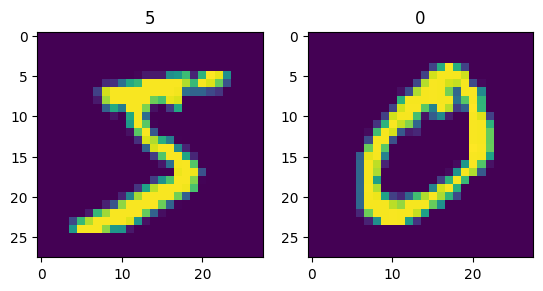

In [106]:
# посмотрим на то, с чем мы работаем
for i in [0, 1]:
    plt.subplot(1, 2, i + 1)
    plt.imshow(mnist_train[i][0].squeeze(0).numpy().reshape([28, 28]))
    plt.title(str(mnist_train[i][1]))
plt.show()

In [108]:
model = nn.Sequential(nn.Flatten(), # преобразует многомерные входные данные в одномерный вектор
                     nn.Linear(28*28, 128),
                        nn.ReLU(),
                      nn.Linear(128, 10))

# Оптимизатор SGD, который будет использоваться для обновления весов модели в процессе обучения
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)

Веса моделей хранятся в виде матриц и выглядят так:

In [109]:
[x for x in model.named_parameters()]

[('1.weight',
  Parameter containing:
  tensor([[-0.0186,  0.0071,  0.0329,  ...,  0.0130, -0.0133,  0.0132],
          [ 0.0145, -0.0130, -0.0147,  ...,  0.0023,  0.0067,  0.0013],
          [ 0.0162,  0.0225,  0.0017,  ...,  0.0107, -0.0320,  0.0128],
          ...,
          [-0.0071,  0.0053,  0.0123,  ..., -0.0098, -0.0256, -0.0318],
          [ 0.0122, -0.0114, -0.0183,  ...,  0.0233, -0.0220,  0.0252],
          [-0.0170,  0.0293, -0.0116,  ...,  0.0009,  0.0330, -0.0052]],
         requires_grad=True)),
 ('1.bias',
  Parameter containing:
  tensor([ 2.3535e-02,  1.6611e-02,  2.8349e-02, -1.5545e-03, -2.0702e-02,
           1.3345e-02,  4.8308e-03, -1.0147e-02, -2.2459e-02, -6.5893e-03,
          -1.4610e-02, -1.8734e-02, -1.5946e-02,  2.3676e-02, -3.3841e-02,
          -1.6467e-02,  3.1094e-02,  1.1721e-02, -1.6920e-02,  2.4554e-02,
          -9.2423e-03, -1.8887e-02,  2.5163e-02,  2.9842e-02, -2.9204e-02,
          -9.6693e-03,  1.6007e-02, -2.7863e-02, -1.6317e-02, -2.6097e-0

Одним из основных преимуществ PyTorch является возможность использования GPU-ускорителей на CUDA-совместимых графических процессорах Nvidia Compute Unified Device Architecture (CUDA) и Apple Metal Performance Shaders (MPS).

Во-первых, мы должны проверить, доступен ли графический процессор, с помощью метода ```is_available()```.

In [110]:
if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')

In [111]:
device

device(type='cuda')

Как только мы определили, что один или несколько графических процессоров доступны, нам нужно поместить наши данные туда, где графический процессор сможет их увидеть. Ваш процессор выполняет вычисления над данными в оперативной памяти вашего компьютера. К вашему графическому процессору подключена выделенная память. Всякий раз, когда вы хотите выполнить вычисление на устройстве, вы должны переместить все данные, необходимые для этого вычисления, в память, доступную этому устройству.

По умолчанию новые тензоры создаются на CPU, поэтому нам нужно указать, когда мы хотим создать наш тензор на графическом процессоре, с помощью необязательного аргумента устройства.

In [112]:
x = torch.rand(2, 2, device=device)
x

tensor([[0.1437, 0.2477],
        [0.3913, 0.8864]], device='cuda:0')

Чтобы выполнять вычисления с использованием двух или более тензоров, все тензоры должны находиться на одном устройстве.

Если у вас уже есть тензор, расположенный на одном устройстве, вы можете переместить его на другое с помощью метода ```to()```.
Перенесем созданную ранее модель на наш новый девайс.

In [113]:
model.to(device)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=128, bias=True)
  (2): ReLU()
  (3): Linear(in_features=128, out_features=10, bias=True)
)

In [114]:
for epoch in range(5):
    for x_train, y_train in tqdm(train_dataloader): # берем батч из трейн лоадера
          y_pred = model(x_train.to(device)) # делаем предсказания
          loss = F.cross_entropy(y_pred, y_train.to(device)) # считаем лосс
          loss.backward() # считаем градиенты обратным проходом
          optimizer.step() # обновляем параметры сети
          optimizer.zero_grad() # обнуляем посчитанные градиенты параметров

    val_loss = []  # сюда будем складывать **средний по бачу** лосс
    val_accuracy = []
    with torch.no_grad():  # на валидации запрещаем фреймворку считать градиенты по параметрам
        for x_val, y_val in tqdm(val_dataloader):  # берем батч из валидационного лоадера
            y_pred = model(x_val.to(device))  # делаем предсказания
            loss = F.cross_entropy(y_pred, y_val.to(device))  # считаем лосс
            val_loss.append(loss.cpu().numpy())  # добавляем в массив
            val_accuracy.extend((torch.argmax(y_pred, dim=-1) == y_val.to(device)).cpu().numpy().tolist())

    # печатаем метрики
    print(f"Epoch: {epoch}, loss: {np.mean(val_loss)}, accuracy: {np.mean(val_accuracy)}")

  0%|          | 0/15000 [00:00<?, ?it/s]

  0%|          | 0/2500 [00:00<?, ?it/s]

Epoch: 0, loss: 0.2130390852689743, accuracy: 0.9373


  0%|          | 0/15000 [00:00<?, ?it/s]

  0%|          | 0/2500 [00:00<?, ?it/s]

Epoch: 1, loss: 0.13865049183368683, accuracy: 0.9591


  0%|          | 0/15000 [00:00<?, ?it/s]

  0%|          | 0/2500 [00:00<?, ?it/s]

Epoch: 2, loss: 0.11684926599264145, accuracy: 0.9652


  0%|          | 0/15000 [00:00<?, ?it/s]

  0%|          | 0/2500 [00:00<?, ?it/s]

Epoch: 3, loss: 0.09869708120822906, accuracy: 0.9702


  0%|          | 0/15000 [00:00<?, ?it/s]

  0%|          | 0/2500 [00:00<?, ?it/s]

Epoch: 4, loss: 0.08723187446594238, accuracy: 0.9742
